In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
def getPeakGain(gain, lengths, p):
    maxGain = 0
    for i in range(1, len(gain)):
        if(maxGain < gain[i]):
            maxGain = gain[i]
            lengthMaxGain = lengths[i-1]
    print("Player: "+ str(p) + " peak gain: " + str(maxGain) + " at length: " + str(lengthMaxGain))   
    
# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2, xlabel, ylabel, showPlot = True, legend = " "):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1, list2, 'o-', label=legend)
    if showPlot == True:
        plt.show()

def readFromFile(path, mode):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if mode==1 or len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results

def plotOneResult(players, results, idx, label):
    for p in players:
        tmp = results[p]
        values = []
        for words in tmp:
            values.append(float(words[idx]))
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
        x = list(range(0, len(values)))
        plt.plot(x, values, 'o-', label= label + str(p))
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()
    
# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values


def EffortPerBodyPartPerPlayer(p, results, batchSize):
    bodyParts =[ [0]*1 for i in range(7)]
    tmp = results[p]
    counter = 0
    for words in tmp:            
        for i in range (7):
            bodyParts[i][bodyParts[i].index(bodyParts[i][-1])] += float(words[21+i])
            
        counter = counter + 1
        if counter == batchSize:
            counter = 0
        if counter == 0:
            for i in range(7):
                bodyParts[i][bodyParts[i].index(bodyParts[i][-1])] /= batchSize
                bodyParts[i].append(0)
    return bodyParts

Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: -1 at length: 1
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 2.943871 at length: 1.588774
Player: 41 gain: 3.164853 at length: 2.221745
Player: 41 gain: 3.164853 at length: 2.221745
Player: 41 g

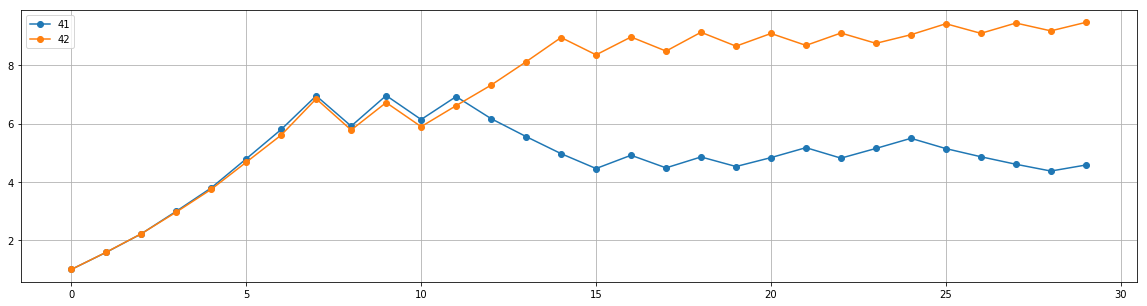

Total time 9.913433333333334


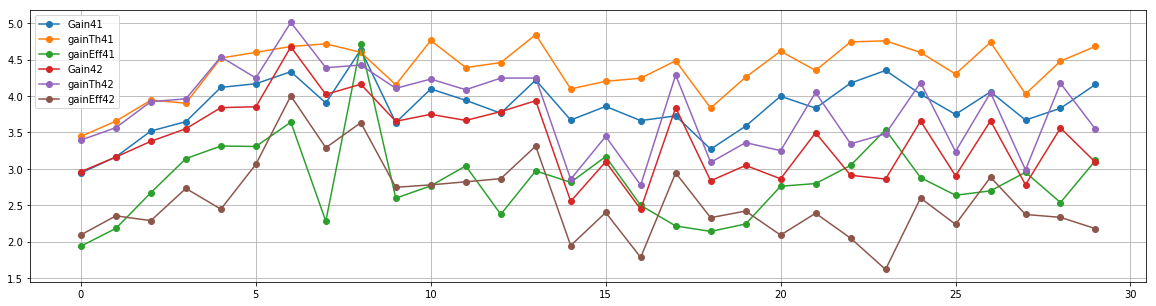

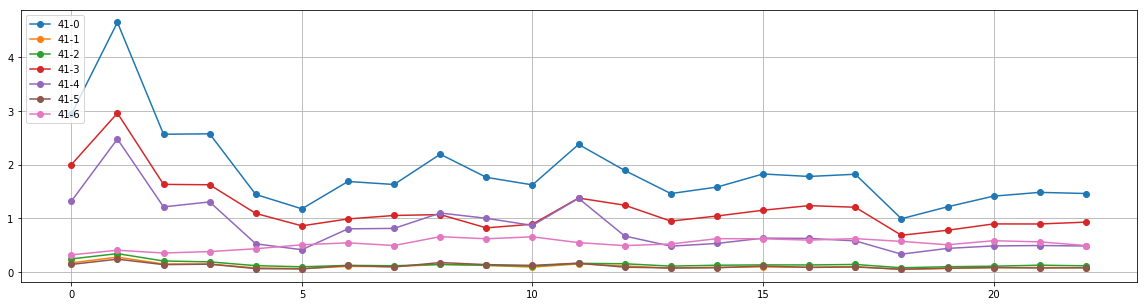

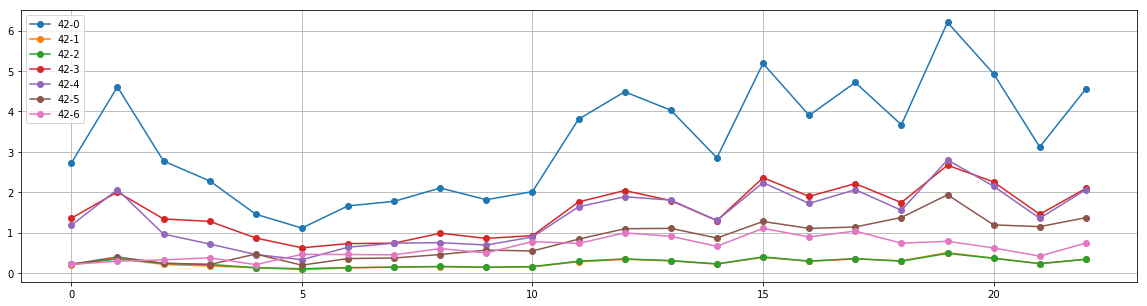

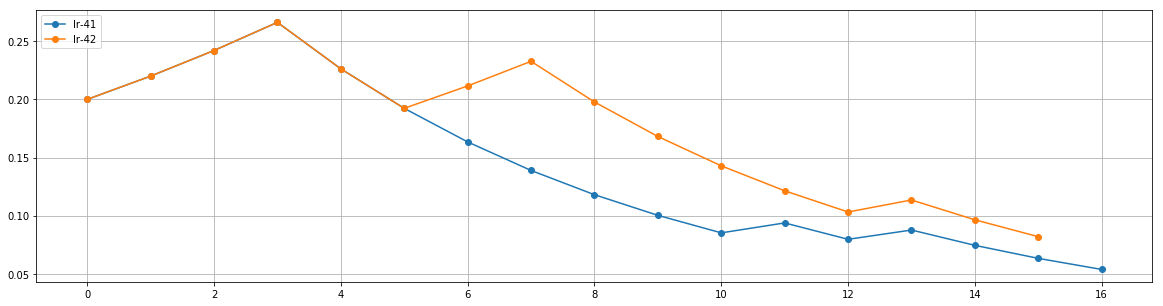

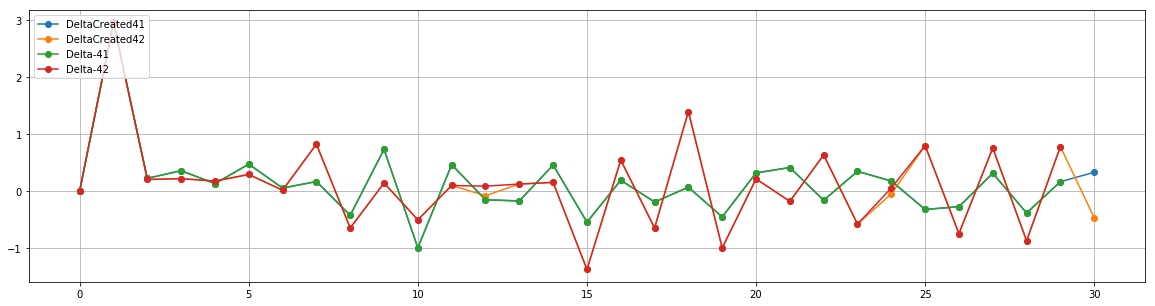

In [16]:
# player 0 = all the shit
# player 1 = something
# player 2 = spiral - random targets
# player 3 = circle - selected targets
# player 4 = spiral - selected targets
# player 5 = circle - selected targets + closer targets
# player 6 = same
# player 7 = 
# player 8 = change effort 
# player 9 = same as 8 

batchSize = 8
players = [41,42]
path ="C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResult.csv"
pathA = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResult.csv"
pathStats ="C:\\Users\\huber\\OneDrive\\Dokumenty\\thesis-hubert\\unity\\SmartuistWrapper\\tapResult.csv"
pathStatsA = "E:\\\\Andreea\\\\Projects\\\\Git\\\\SmartsuitWrapper\\\\SmartuistWrapper\\\\GradientStats.csv"
plt.rcParams['figure.figsize'] = [20, 5]
maxGain = 0

# read tap results / player
results = readFromFile(pathA, 0)

# read gradient results / player
gradientStats = readFromFile(pathStatsA, 1)

for p in players:
    tmp = results[p]
    prevLength = 1
    lengths = []
    gain = []
    delta = []
    th = []
    totalTime = 0
    for words in tmp:
        totalTime += float(words[10])
        lengths.append(float(words[28]))
        gain.append(float(words[29]))
        th.append(float(words[11]))      
        print("Player: "+ str(p) + " gain: " + words[29] + " at length: " + words[28])      

    uniqueLengths = [x for i, x in enumerate(lengths) if i == lengths.index(x)]
    x = list(range(0, len(uniqueLengths)))   
    plt.plot(x, uniqueLengths, 'o-', label=p)
    
    uniqueGain = [x for i, x in enumerate(gain) if i == gain.index(x)]
    getPeakGain(uniqueGain, uniqueLengths, p)


plt.legend(loc='upper left')
plt.grid(True)
plt.show()
print("Total time", totalTime/60000)

for p in players:
    tmp = gradientStats[p]
    gain = []
    gainEff = []
    gainTh = []
    for words in tmp:
        gain.append(float(words[5]))
        gainTh.append(float(words[3]))
        gainEff.append(float(words[2]))

   
    x = list(range(0, len(gain)))
    plt.plot(x, gain, 'o-', label="Gain"+str(p))
    plt.plot(x, gainTh, 'o-', label="gainTh"+str(p))
    plt.plot(x, gainEff, 'o-', label="gainEff"+str(p))
    
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

for p in players:
    bodyParts = EffortPerBodyPartPerPlayer(p, results, 10)
    z = 0
    x = list(range(0, len(bodyParts[0])-2))
    for a in bodyParts:
        if z in [0,1,2,3,4,5,6]:
            plt.plot(x,a[:len(a)-2], 'o-', label= str(p) + "-" + str(z))
        z = z + 1
        
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()     
    
# plot learning rate
plotOneResult(players, gradientStats, 6, "lr-")


for p in players:
    tmp = gradientStats[p]
    gain = [0]
    prevGain = [0]
    for words in tmp:
        gain.append(float(words[5]))
        prevGain.append(float(words[4]))
    delta = np.array(gain) - np.array(prevGain)    
    x = list(range(0, len(delta)))
    plt.plot(x, delta, 'o-', label="DeltaCreated"+str(p))

# plot delta
plotOneResult(players, results, 30, "Delta-")


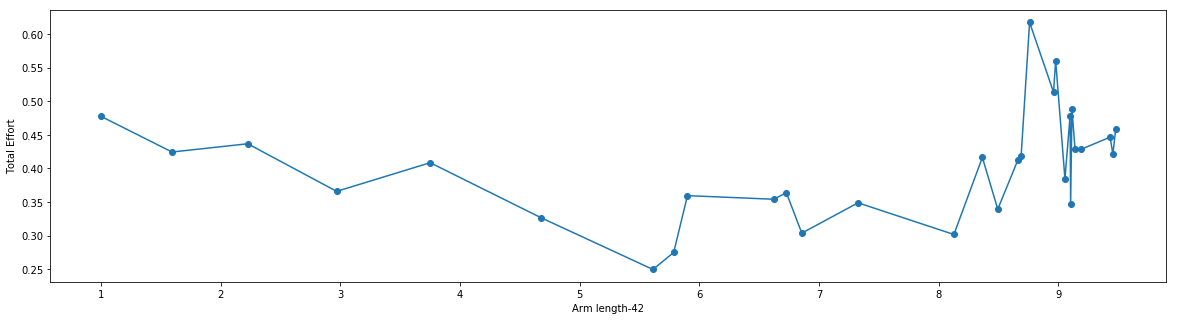

IndexError: index 26 is out of bounds for axis 1 with size 25

In [17]:
players = [58]
for p in players:
    uniqueLengths = getResultPerPlayer(p, results, 28, True )
    gainEffort = getResultPerPlayer(p, gradientStats, 2, False )
    effort = [1/x for x in gainEffort]
    
    #getCombinedPlot(uniqueLengths, gainEffort, "Arm length-"+str(p), "gainEffort") 
    getCombinedPlot(uniqueLengths, effort, "Arm length-"+str(p), "Total Effort") 
    
    #body, LeftUpperArm, RightUpperArm, RightFoot, LeftFoot, LeftHand, RightHand
    bodyParts = EffortPerBodyPartPerPlayer(p, results, 10)
    getCombinedPlot(uniqueLengths, bodyParts[0], "Arm length-"+str(p), "effort Body") 
    getCombinedPlot(uniqueLengths, bodyParts[1], "Arm length-"+str(p), "effort Upper Arm", False, "Left") 
    getCombinedPlot(uniqueLengths, bodyParts[2], "Arm length-"+str(p), "effort Upper Arm", False, "Right") 
    plt.show()
   # getCombinedPlot(uniqueLengths, bodyParts[5], "lengths-"+str(p), "effortLeftHand") 
   # getCombinedPlot(uniqueLengths, bodyParts[6], "lengths-"+str(p), "effortRightHand") 
